# Scratch Code of GoogleNet Model using <b>Functional API<b>

## Table of contents

1. [Importing Required Dependencies](#library)
2. [GoogleNet Model Function](#model_function)
3. [Model Summary](#summary)
4. [Plotting The Model Architecture](#plot)

### Importing Required Dependencies <a name = "library"></a>

In [44]:
from keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Flatten, Dense, Input, Concatenate, Dropout, concatenate
from keras.models import Model
from keras.utils import plot_model

### GoogleNet Model Function <a name = "model_function"></a>

In [76]:
def inception_module(x, names, 
                     filter_1x1, 
                     filter_3x3_reduce, filter_3x3, 
                     filter_5x5_reduce, filter_5x5,
                     filter_3x3_pool):
  
  conv_1x1 = Conv2D(filters = filter_1x1, kernel_size = (1,1), padding = 'same', activation = 'relu')(x)

  conv_3x3 = Conv2D(filters = filter_3x3_reduce, kernel_size = (1,1), padding = 'same', activation = 'relu')(x)
  conv_3x3 = Conv2D(filters = filter_3x3, kernel_size = (3,3), padding = 'same', activation = 'relu')(conv_3x3)

  conv_5x5 = Conv2D(filters = filter_5x5_reduce, kernel_size = (1,1), padding = 'same', activation = 'relu')(x)
  conv_5x5 = Conv2D(filters = filter_5x5, kernel_size = (5,5), padding = 'same', activation = 'relu')(conv_5x5)
  
  pool_3x3 = MaxPool2D((3,3), strides = (1,1), padding = 'same')(x)
  pool_3x3 = Conv2D(filters = filter_3x3_pool, kernel_size = (1,1), padding = 'same', activation = 'relu')(pool_3x3)

  x = concatenate([conv_1x1, conv_3x3, conv_5x5, pool_3x3], axis = 3, name = names)
  return x

def GoogleNet():
  # Input
  input_layer = Input(shape = (224, 224, 3), name = 'input_layer')
  # Block_1
  x = Conv2D(filters = 64, kernel_size = (7,7), strides = (2,2), padding = 'same', activation = 'relu', name = 'block1_conv1_7x7')(input_layer)
  x = MaxPool2D((3,3), strides = (2,2), name = 'block1_pool_3x3')(x)
  # Block_2
  x = Conv2D(filters = 64, kernel_size = (1,1), strides = (1,1), padding = 'same', activation = 'relu', name = 'block2_conv2a_1x1')(x)
  x = Conv2D(filters = 192, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu', name = 'block2_conv2b_3x3')(x)
  x = MaxPool2D((3,3), strides = (2,2), name = 'block2_pool_3x3')(x)
  # Inception module 3a
  x = inception_module(x, 'inception3a', 64, 96, 128, 16, 32, 32)
  # Inception module 3b
  x = inception_module(x, 'incpetion3b', 128, 128, 192, 32, 96, 64)
  # Maxpooling
  x = MaxPool2D((3,3), strides = (2,2))(x)
  # inception module 4a
  x = inception_module(x, 'inception4a', 192, 96, 208, 16, 48, 64)
  
  # Auxiliary Moduel 1
  x1 = AveragePooling2D((5,5), strides = 3)(x)
  x1 = Conv2D(filters = 128, kernel_size = (1,1), strides = (1,1), padding = 'same', activation = 'relu')(x1)
  x1 = Flatten()(x1)
  x1 = Dropout(0.4)(x1)
  x1 = Dense(1000, activation = 'relu')(x1)
  x1 = Dense(1000, activation = 'softmax', name = 'Auxiliary_output_1')(x1)

  # inception module 4b
  x = inception_module(x, 'inception4b', 160, 112, 224, 24, 64, 64)
  # inception module 4c
  x = inception_module(x, 'inception4c', 128, 128, 256, 24, 64, 64)
  # inception module 4d
  x = inception_module(x, 'inception4d', 112, 144, 288, 32, 64, 64)
  
  # Auxiliary Moduel 2
  x2 = AveragePooling2D((5,5), strides = 3)(x)
  x2 = Conv2D(filters = 128, kernel_size = (1,1), strides = (1,1), padding = 'same', activation = 'relu')(x2)
  x2 = Flatten()(x2)
  x2 = Dropout(0.4)(x2)
  x2 = Dense(1000, activation = 'relu')(x2)
  x2 = Dense(1000, activation = 'softmax', name = 'Auxiliary_output_2')(x2)

  # inception module 4e
  x = inception_module(x, 'inception4e', 256, 160, 320, 32, 128, 128)
  # Maxpooling
  x = MaxPool2D((3,3), strides = (2,2))(x)
  # inception module 5a
  x = inception_module(x, 'inception5a', 256, 160, 320, 32, 128, 128)
  # inception module 5b
  x = inception_module(x, 'inception5b', 384, 192, 384, 48, 128, 128)
  # Average Pooling
  x = AveragePooling2D((6,6), strides = (1,1), name = 'Average_Pooling')(x)
  # Dropout
  x = Dropout(0.4, name = 'Dropout_Layer')(x)
  # output layer
  output = Dense(1000, activation = 'softmax', name = 'output_layer')(x)

  model = Model(inputs = input_layer, outputs = output, name = 'Inception v1 Model')
  return model

In [77]:
model = GoogleNet()

### Model Summary <a name = "summary"></a>

In [78]:
model.summary()

Model: "Inception v1 Model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_layer (InputLayer)       [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1_7x7 (Conv2D)      (None, 112, 112, 64  9472        ['input_layer[0][0]']            
                                )                                                                 
                                                                                                  
 block1_pool_3x3 (MaxPooling2D)  (None, 55, 55, 64)  0           ['block1_conv1_7x7[0][0]']       
                                                                                 

### Plotting The Model Architecture <a name = "plot"></a>

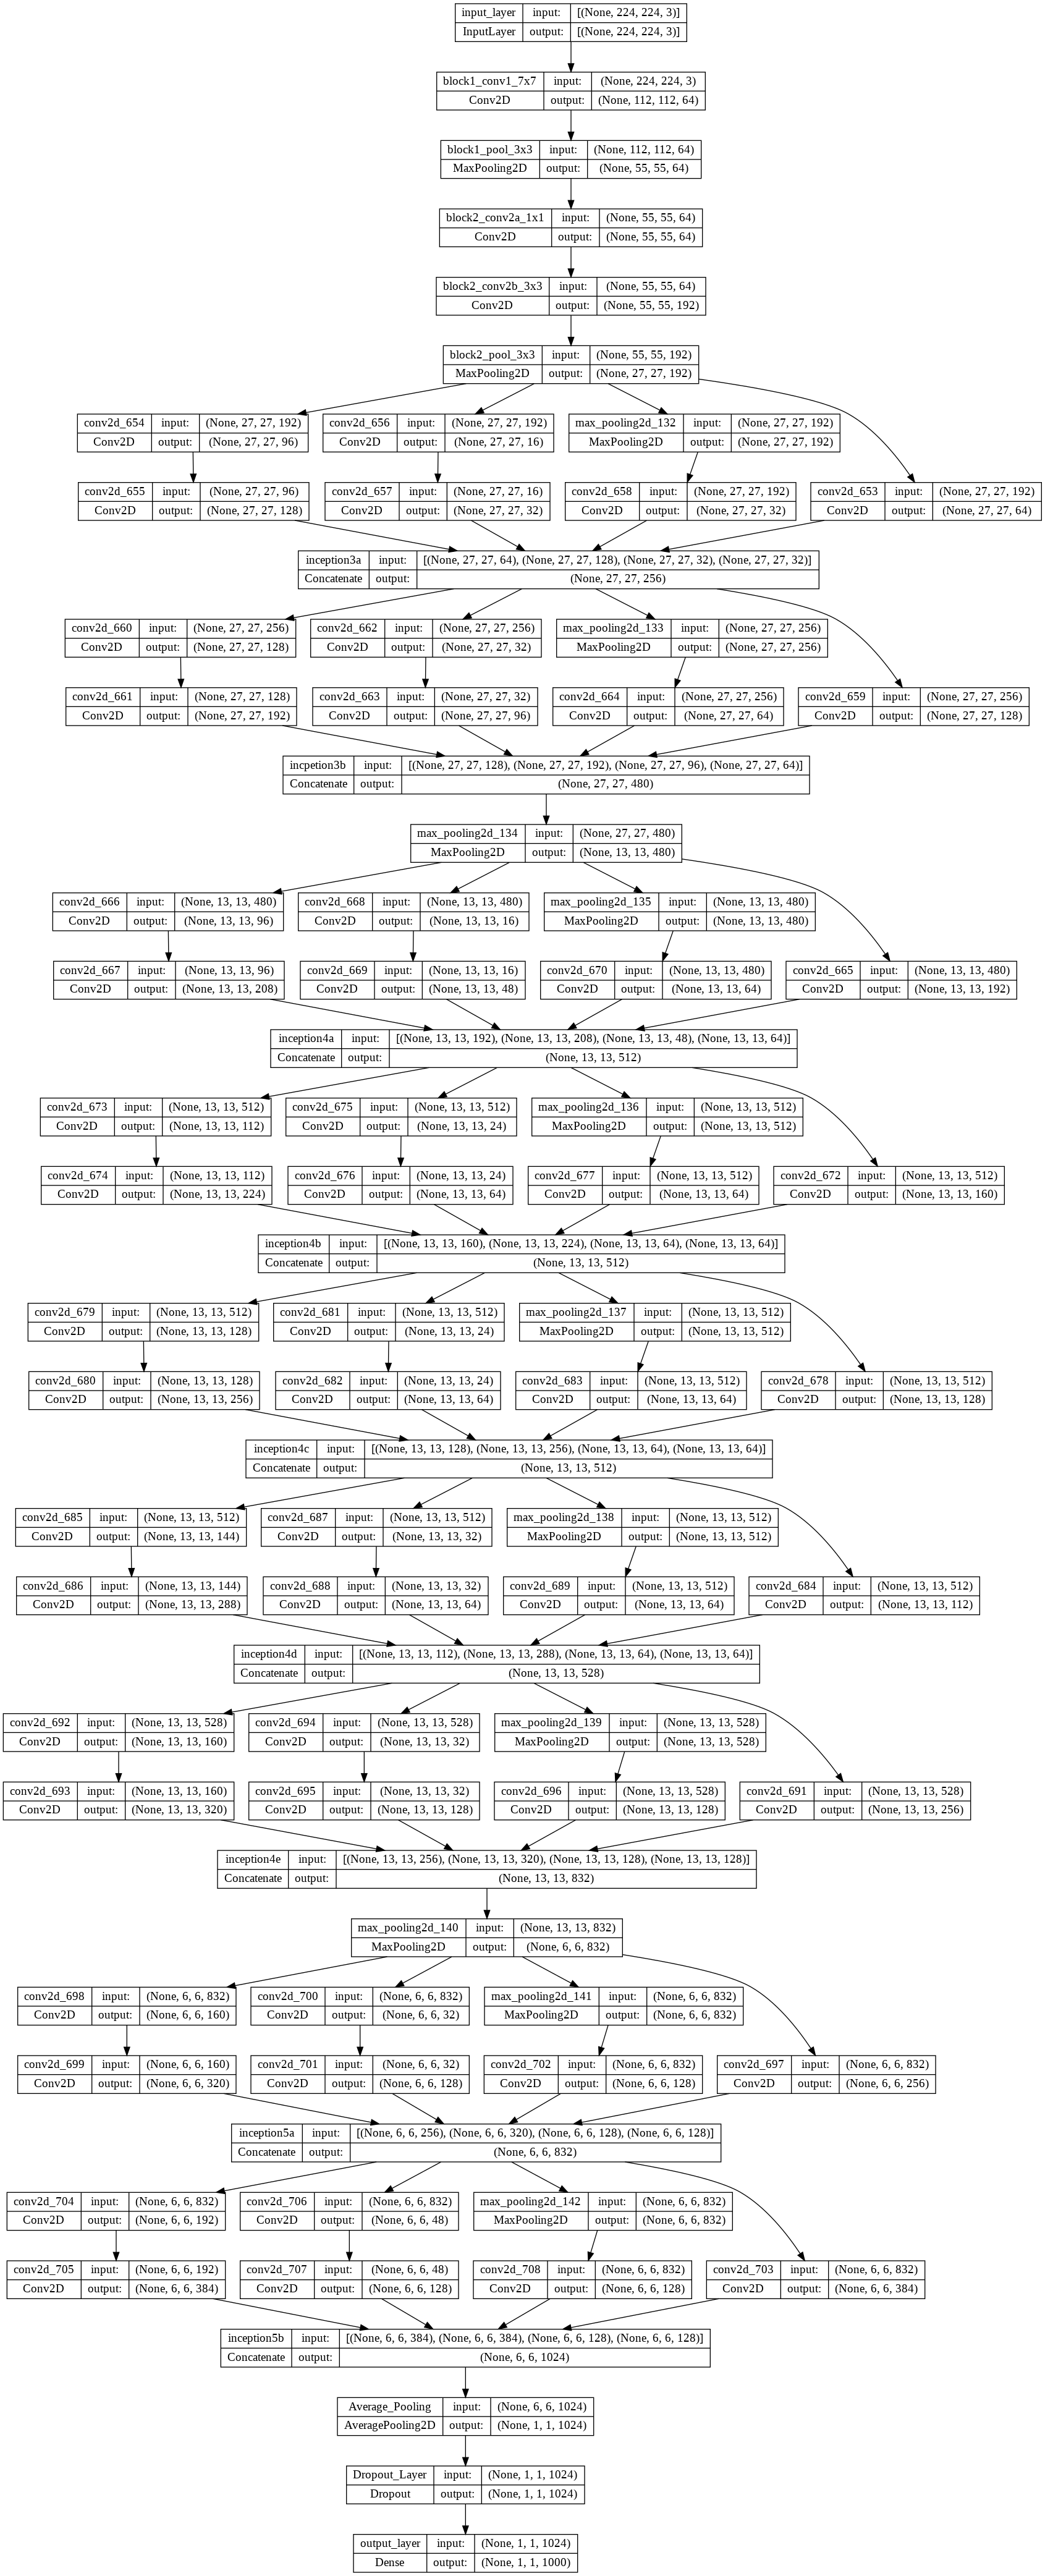

In [79]:
plot_model(model, show_shapes = True, to_file = 'model.png')